# Моделирование 3 - Прецессия Гироскопа

На корабле вдоль продольной оси установлена турбина. Ротор турбины (1) имеет массу $M$ и может считаться сплошным диском с радиусом $R$ , который вращается с частотой ν = 3000 об/мин. Расстояние между подшипниками (2 и 3) составляет $5м$. Определить максимальные гироскопические давление на подшипники турбины при килевой качке с амплитудой $a$ и периодом $T$ вокруг оси (4), перпендикулярной оси ротора.

| $M, кг$ | $R, м$ | $a, \degree$ | $T,c$ |
| - | - | - | - |
| 1000 | 0.5 |от 4 до 9 | от 9 до 14 |

<p align="center">
  <img src="1.jpg" style="height: 200px;"/>
</p>


Угловая скорость вращения ротора турбины равна:

$$ \omega = 3000 \cdot \frac{2\pi}{60} = 100\pi \left(\frac{рад}{c}\right) $$

$$\theta(t) = sin(2\pi \frac{t}{t_n})$$

$$
\omega_2 = \frac{d\theta}{dt} = a_n \cdot 2\pi \frac{1}{t_n}cos(2\pi\frac{1}{t_n}) \\
$$

Максимальное значение $\omega_2$ происходит при $cos(2\pi\frac{1}{t_n})=1$ поэтому

$$
\omega_{2max} = a_n \cdot \frac{2\pi}{t_n}
$$

Гироскопический момент, момент инерции, максимальное гироскопическое давление на подшипники будем искать вот так:
$$
M_g = I \cdot \omega_1 \cdot \omega_2  (Nm) \\
I = \frac{1}{2} MR^2 \\
F_g = \frac{M_g}{L} = \frac{I \cdot \omega_1 \cdot \omega_2}{L} = \frac{MR^2 \cdot \omega_1 \cdot \omega_2 }{2 L}
$$

In [2]:
from numpy import arange
from math import pi
import matplotlib.pyplot as plt

# variables
V = 3000 / 60             # rad / s
L = 5                     # m
M = 1000                  # kg
R = 0.5                   # m
a_min, a_max = 4, 9       # degrees
T_min, T_max = 9, 14      # s

# new
w1 = V * 2 * pi

def w2_max(a_n, T_n): 
  return (a_n * (pi ** 2))/(90 * T_n)

def force(w2):
  return (M * (R**2) * w1 * w2)/(2 * L)

totalP = []
totalA = []
totalT = []

for a in arange(a_min, a_max, 0.01):
  for T in arange(T_min, T_max, 0.01):
    p = force(w2_max(a, T))
    totalP.append(p);
    totalA.append(a);
    totalT.append(T);

index = totalP.index(max(totalP))

print('{:25s}'.format("Pressure:"), "%.7f" % totalP[index])
print('{:25s}'.format("Amplitude:"), "%.7f" % totalA[index])
print('{:25s}'.format("Period:"), "%.7f" % totalT[index])


Pressure:                 860.3284795
Amplitude:                8.9900000
Period:                   9.0000000


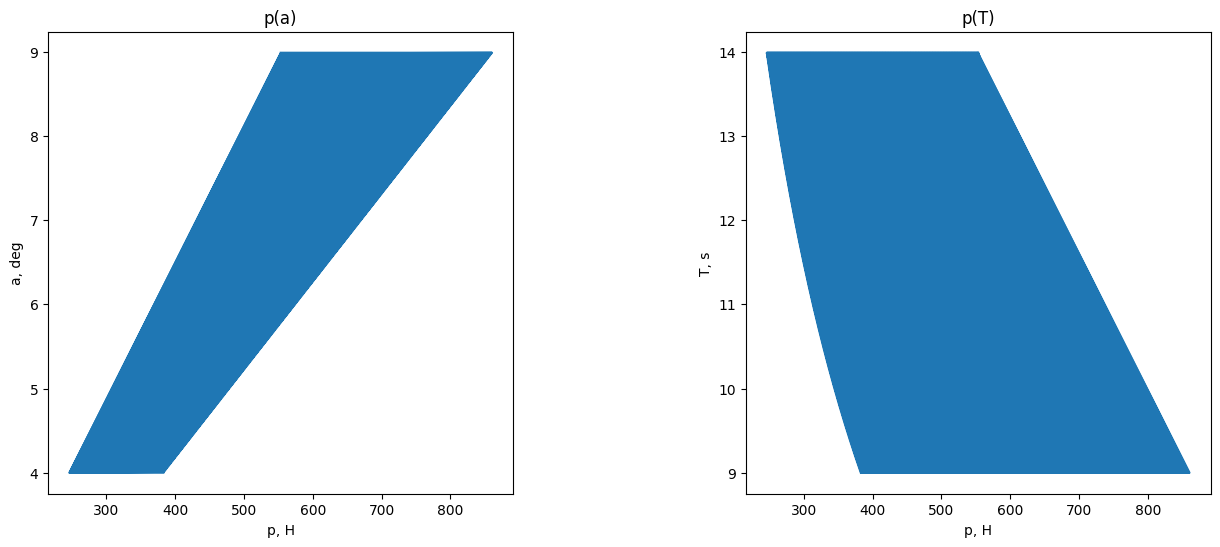

In [5]:

figure = plt.figure(figsize=(15, 15))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plot1 = figure.add_subplot(2, 2, 1)
plot1.set_title("p(a)")
plot1.set_xlabel("p, H")
plot1.set_ylabel("a, deg")
plot1.plot(totalP, totalA)

plot2 = figure.add_subplot(2, 2, 2)
plot2.set_title("p(T)")
plot2.set_xlabel("p, H")
plot2.set_ylabel("T, s")
plot2.plot(totalP, totalT)

plt.show()